In [42]:
import numpy as np
import pandas as pd

import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest
import scipy

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [43]:
np.seterr(divide = 'ignore') 

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

# Kullback–Leibler divergence
<br/>
\begin{equation}
\text{For discrete probability distributions P and Q }: \\
D_{KL} (P \left |  \right | Q) = \sum{P(x)} \log\left( \frac{P(x)}{Q(x)} \right )
\end{equation}

<br/>
\begin{equation}
\text{For distributions P and Q of a continuous random variable} \\
D_{KL} (P \left |  \right | Q) =  \int_{a}^{b} {p(x)}  \left(\frac{p(x)}{q(x)} \right ) dx
\end{equation}
<br/>

In [44]:

# dataset_1 = stats.randint.rvs(low=0, high=100 , size=100, loc=0)
# dataset_2 = stats.randint.rvs(low=0, high=100 , size=100, loc=0)

# Generate data distibution instead of data

dataset_1 = stats.norm.rvs(size=10, loc=50, scale=10)
dataset_2 = stats.norm.rvs(size=10, loc=60, scale=10)


In [45]:
print(f'dataset 1 = {dataset_1} \n')
print(f'dataset 2 = {dataset_2} \n')

dataset 1 = [53.29770447 40.8405398  61.41059992 40.50391643 47.13714906 41.10322322
 50.25160247 26.90788707 50.27872647 66.77459678] 

dataset 2 = [69.46818452 52.54666278 47.73812307 61.71911807 73.47660156 60.2096832
 53.91938206 65.88671391 42.12242492 53.44654768] 



In [46]:
type(dataset_1)

numpy.ndarray

<Axes: ylabel='Count'>

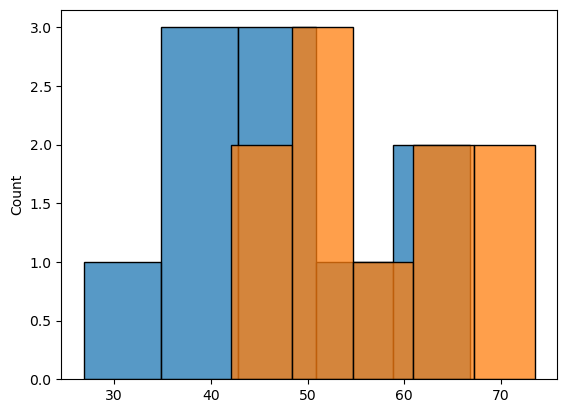

In [47]:
sns.histplot(dataset_1)
sns.histplot(dataset_2)

In [48]:
# Calculate data_1 probabilities as p
p = dataset_1 / np.sum(dataset_1)
print(f'p = {p} \n')

# Calculate data_2 probabilities as q
q = dataset_2 / np.sum(dataset_2)
print(f'q = {q} \n')

p = [0.11138358 0.08535012 0.12833822 0.08464663 0.09850901 0.08589909
 0.10501772 0.05623313 0.1050744  0.1395481 ] 

q = [0.11966267 0.09051445 0.08223148 0.10631449 0.12656739 0.10371441
 0.09287903 0.1134934  0.07255814 0.09206455] 



\begin{equation}
\mathrm{kl\_div}(x, y) =
      \begin{cases}
        x \log(x / y) - x + y & x > 0, y > 0 \\
        y & x = 0, y \ge 0 \\
        \infty & \text{otherwise}
      \end{cases}
\end{equation}

In [49]:
p * np.log(p/ q)

array([-0.00798585, -0.00501412,  0.05712731, -0.01929235, -0.024689  ,
       -0.01618922,  0.01289945, -0.03948907,  0.03890701,  0.05804077])

In [50]:
# Kl Function Test
def kl_test(kl_p, kl_q):
    kl = np.where(np.logical_and( kl_p > 0, kl_q >= 0 ), kl_p * np.log(kl_p/ kl_q), 0)
    return kl

In [51]:
kl_test(p ,q)

array([-0.00798585, -0.00501412,  0.05712731, -0.01929235, -0.024689  ,
       -0.01618922,  0.01289945, -0.03948907,  0.03890701,  0.05804077])

In [52]:
np.sum(kl_test(p, q))

0.05431493501824671

In [53]:
# Calculate KL (for discret values)
# NOTE: Logarithm 0 and negative numbers is undefined. So here kl is calculated 
# for both p and q positive values according the formula 

def kl_divergence(kl_p, kl_q):
    #kl = np.sum(np.where(np.logical_and( kl_p > 0, kl_q > 0 ), kl_p * np.log(kl_p/ kl_q), 0))
    # test the value and explain the result
    kl = np.sum(p * np.log(p / q, where=((p > 0) & (q > 0))))

    return kl 

In [54]:
kl_divergence(p, q)

0.05431493501824671

------------
### KL with python libraries:

In [55]:
kl2 = scipy.special.kl_div(p, q, out=None, where=(p>0) & (q>0))
np.sum(kl2)

0.05431493501824666

In [56]:
x = np.arange(-10, 10, 0.1)
len(x)

200

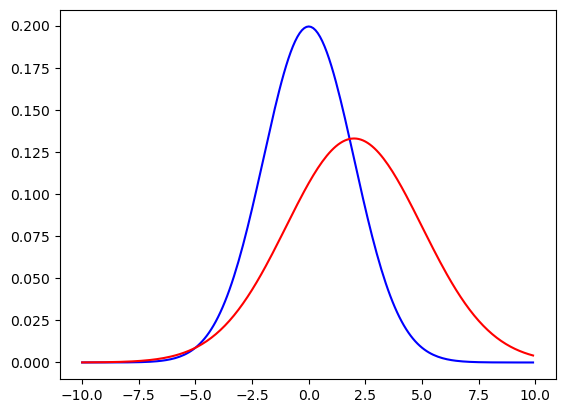

In [57]:
p = stats.norm.pdf(x, loc=0, scale=2)
q = stats.norm.pdf(x, loc=2, scale=3)

plt.plot(x, p, c='blue')
plt.plot(x, q, c='red')

In [58]:
kl_divergence(p, q)

3.499136647472285

In [59]:
np.sum(scipy.special.kl_div(p, q, out=None, where=(p > 0) & (q > 0)))

3.4586162357451027

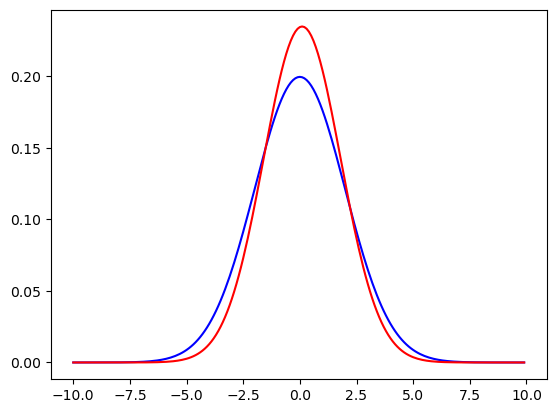

In [60]:
p = stats.norm.pdf(x, loc=0, scale=2)
q = stats.norm.pdf(x, loc=0.1, scale=1.7)

plt.plot(x, p, c='blue')
plt.plot(x, q, c='red')

In [61]:
kl_divergence(p, q)

0.3124983631251924

In [62]:
np.sum(scipy.special.kl_div(p, q, out=None, where=(p>0) & (q>0)))

0.31250408117350226

## Sample: 
* 1- Determine if males weight has distributed normally

In [63]:
df = pd.read_csv('../../Datasets/weight-height.csv', delim_whitespace=True)

In [64]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [65]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [66]:
df.groupby('Gender').mean()

,Height,Weight
Gender,,
Female,63.708774,135.860093
Male,69.026346,187.020621


In [67]:
# df.query('Gender == "Male"')['Height']
males = df[df['Gender'] == 'Male']['Height']

<Axes: >

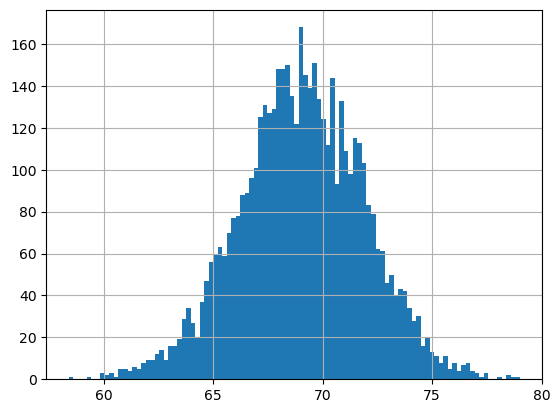

In [68]:
males.hist(bins=100)

In [69]:
males.describe()

count    5000.000000
mean       69.026346
std         2.863362
min        58.406905
25%        67.174679
50%        69.027709
75%        70.988744
max        78.998742
Name: Height, dtype: float64

In [70]:
males.mean()

69.02634590621741

In [71]:
males.std()

2.863362228660651

In [72]:
# view historgram values separatly, frequencies and boundries:
count, boundry = np.histogram(males, bins=100)
print(count)
print(boundry)

[  1   0   0   0   1   0   0   3   2   3   1   5   5   4   6   5   8   9
   9  12  14   9  16  16  19  29  34  27  20  37  47  56  60  63  59  70
  77  78  88  89  96 101 125 131 127 129 148 148 150 135 122 168 145 139
 151 134 124 112 144  93 133 109  98 115 113 103  83  79  62  61  46  50
  40  43  42  34  28  30  16  20  13  11   8  11   5   8   4   7   8   4
   3   1   3   0   0   1   0   2   1   1]
[58.40690493 58.61282331 58.81874168 59.02466005 59.23057843 59.4364968
 59.64241518 59.84833355 60.05425192 60.2601703  60.46608867 60.67200705
 60.87792542 61.0838438  61.28976217 61.49568054 61.70159892 61.90751729
 62.11343567 62.31935404 62.52527241 62.73119079 62.93710916 63.14302754
 63.34894591 63.55486429 63.76078266 63.96670103 64.17261941 64.37853778
 64.58445616 64.79037453 64.9962929  65.20221128 65.40812965 65.61404803
 65.8199664  66.02588478 66.23180315 66.43772152 66.6436399  66.84955827
 67.05547665 67.26139502 67.46731339 67.67323177 67.87915014 68.08506852
 68.290986

In [73]:
sorted(list(zip(count, boundry)), reverse=True);

In [74]:
# Generate a normal random value set, to compare with
ideal = stats.norm.rvs(size=len(males), loc=males.mean(), scale=males.std())

(array([  19.,   87.,  392.,  888., 1370., 1217.,  689.,  277.,   51.,
          10.]),
 array([59.22076008, 61.23387807, 63.24699606, 65.26011404, 67.27323203,
        69.28635002, 71.29946801, 73.312586  , 75.32570398, 77.33882197,
        79.35193996]),
 <BarContainer object of 10 artists>)

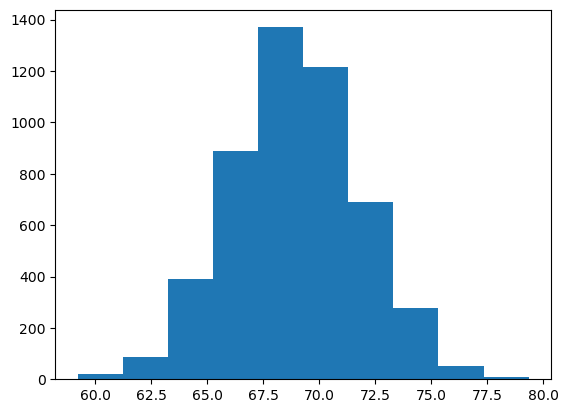

In [75]:
plt.hist(ideal)

In [76]:
# view historgram values separatly, frequencies and boundries:
icount, iboundry = np.histogram(ideal, bins=100)
print(icount)
print(iboundry)

[  1   0   1   3   2   1   1   6   1   3   5   3   5   3   8  12  10  14
  15  12  25  23  28  28  31  47  53  56  55  46  73  72  71  68  76  96
  96 111 101 124 121 124 134 120 139 133 151 138 165 145 151 117 135 128
 128 124 125 106 112  91  92  95  94  91  60  60  64  54  40  39  41  34
  35  31  31  24  24  26  16  15  10   7   7  11   6   2   4   0   3   1
   2   0   0   3   1   0   2   1   0   1]
[59.22076008 59.42207188 59.62338368 59.82469548 60.02600728 60.22731907
 60.42863087 60.62994267 60.83125447 61.03256627 61.23387807 61.43518987
 61.63650167 61.83781346 62.03912526 62.24043706 62.44174886 62.64306066
 62.84437246 63.04568426 63.24699606 63.44830786 63.64961965 63.85093145
 64.05224325 64.25355505 64.45486685 64.65617865 64.85749045 65.05880225
 65.26011404 65.46142584 65.66273764 65.86404944 66.06536124 66.26667304
 66.46798484 66.66929664 66.87060843 67.07192023 67.27323203 67.47454383
 67.67585563 67.87716743 68.07847923 68.27979103 68.48110283 68.68241462
 68.88372

In [77]:
p = (count/ np.sum(count))
q = (icount/ np.sum(icount))           

In [78]:
kl_divergence(p, q)

C:\Users\104974068\AppData\Local\Temp\ipykernel_8328\3197093547.py:8: RuntimeWarning: invalid value encountered in divide
  kl = np.sum(p * np.log(p / q, where=((p > 0) & (q > 0))))


0.24038733637922136

In [79]:
# np.sum(scipy.special.kl_div(p_males, q_males, out=None, where=(p_males>0) & (q_males>0)))
np.sum(scipy.special.kl_div(p, q, out=None, where=(p > 0) & (q > 0)))


0.2405873363792214

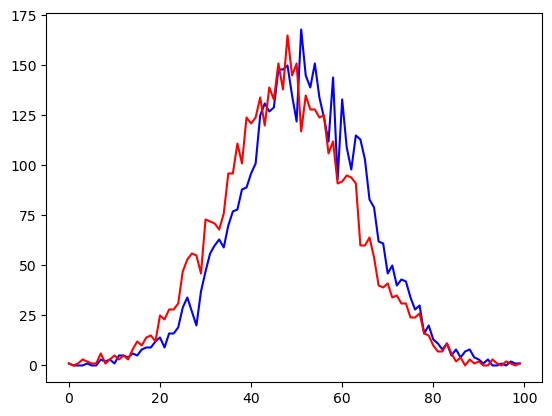

In [80]:
plt.plot(count, c='b')
plt.plot(icount, c='r')

### Interpration
greater kl value = more difference 
* pos:
* 0:
* neg:


_____________________

-----
## Jenson and Shanon